<a href="https://colab.research.google.com/github/sshk73/cap_siem_team-hk/blob/main/cap_siem_securitylogs_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# prompt: upload csv file

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving parsed_security_logs.csv to parsed_security_logs.csv
User uploaded file "parsed_security_logs.csv" with length 15155891 bytes


In [14]:
df= pd.read_csv('parsed_security_logs.csv')

In [15]:
df.shape

(28923, 3)

In [17]:
df.head()

,TimeCreated,Id,Message
0,3/16/2025 4:20:54 PM,5379,Credential Manager credentials were read.\r\n\...
1,3/16/2025 4:20:54 PM,5379,Credential Manager credentials were read.\r\n\...
2,3/16/2025 4:20:54 PM,5379,Credential Manager credentials were read.\r\n\...
3,3/16/2025 4:20:54 PM,5379,Credential Manager credentials were read.\r\n\...
4,3/16/2025 4:20:54 PM,5379,Credential Manager credentials were read.\r\n\...


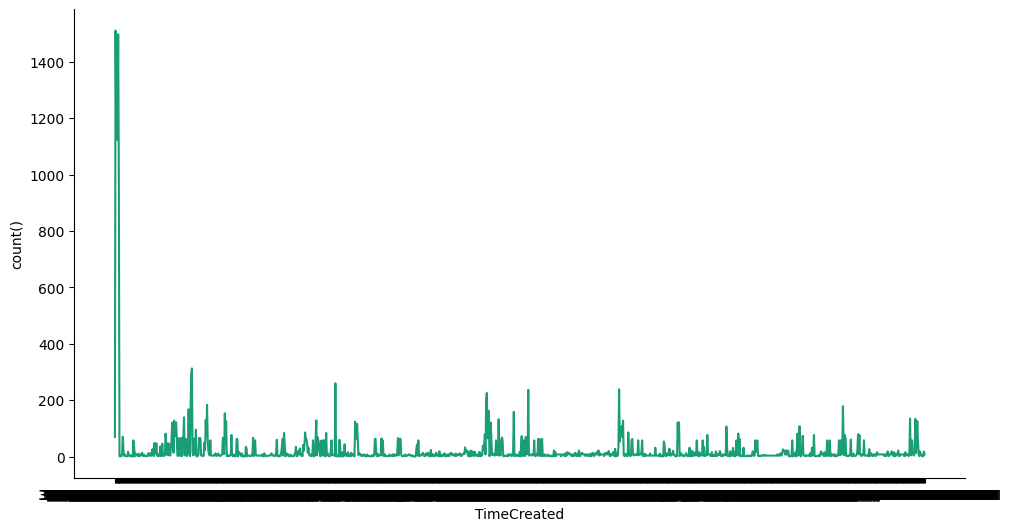

In [20]:
# @title TimeCreated vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['TimeCreated']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'TimeCreated'}, axis=1)
              .sort_values('TimeCreated', ascending=True))
  xs = counted['TimeCreated']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('TimeCreated', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('TimeCreated')
_ = plt.ylabel('count()')

In [18]:
# Analyze failed logins
failed_logins = df[df['Message'].str.contains("Failed", na=False)]
print(failed_logins)

Empty DataFrame
Columns: [TimeCreated, Id, Message]
Index: []


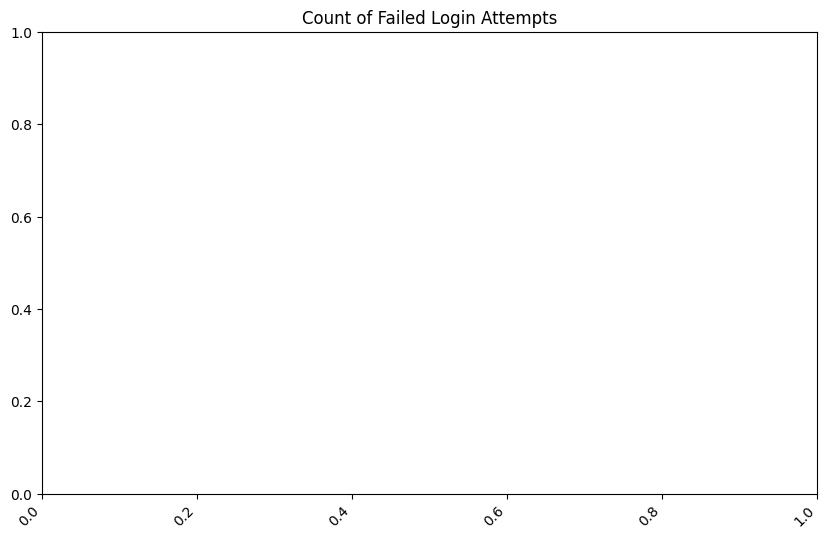

No 'Timestamp' column found in the dataframe. Unable to create a time series plot.
No numerical column 'some_numerical_column' found. Please replace with a valid column name to visualize.


In [19]:
# prompt: visualise df

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains a column named 'Message'

# Example 1: Countplot of failed login attempts
plt.figure(figsize=(10, 6))
sns.countplot(x='Message', data=failed_logins)
plt.title('Count of Failed Login Attempts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

# Example 2:  Time series plot of failed logins (if you have a datetime column)
# Replace 'Timestamp' with the actual name of your datetime column
# If you don't have a datetime column, create one from your log data first.
if 'Timestamp' in df.columns:
    failed_logins['Timestamp'] = pd.to_datetime(failed_logins['Timestamp']) # Convert to datetime objects
    failed_logins = failed_logins.set_index('Timestamp')
    plt.figure(figsize=(12, 6))
    failed_logins['Message'].resample('H').count().plot()  # Count failed logins per hour
    plt.title('Failed Login Attempts Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Number of Failed Attempts')
    plt.show()
else:
    print("No 'Timestamp' column found in the dataframe. Unable to create a time series plot.")


# Example 3: Histogram of a numerical column
# Replace 'some_numerical_column' with the actual name of a numerical column in your dataframe
if 'some_numerical_column' in df.columns:
  plt.figure(figsize=(8, 6))
  plt.hist(df['some_numerical_column'], bins=20) # Adjust bins as needed
  plt.title('Distribution of Some Numerical Column')
  plt.xlabel('some_numerical_column Value')
  plt.ylabel('Frequency')
  plt.show()
else:
  print("No numerical column 'some_numerical_column' found. Please replace with a valid column name to visualize.")


# Add more visualizations as needed based on your DataFrame structure and analysis goals
# For example:
# - Box plots for comparing distributions
# - Scatter plots for relationships between two variables
# - Heatmaps for correlations
# etc.


